# Project Overview

This project is my inaugural venture into the world of machine learning, with a focus on understanding the entire lifecycle of a machine learning project. From data preprocessing to model deployment, this project aims to provide a hands-on experience with each critical phase of developing a predictive model, while also emphasizing effective team collaboration.

## Project Goal

The primary goal is to develop a predictive model that determines whether a flight will arrive at its destination with a delay of at least 15 minutes. The model utilizes various flight-related features, including:

- Carrier Name
- Distance to Destination
- Flight Date
- Additional relevant attributes

## Key Aspects

- **Data Preprocessing:** Involves cleaning and organizing the dataset to prepare it for analysis.
- **Feature Engineering:** Focuses on selecting and creating features that enhance the model's performance.
- **Model Development:** Includes training, tuning, and evaluating different machine learning algorithms.
- **Deployment:** Prepares the final model for real-world application and implements deployment strategies.
- **Team Collaboration:** Highlights the importance of working cohesively with team members, supporting each other through the project lifecycle.

This project is designed not only to build a functional predictive model but also to provide valuable insights into the end-to-end process of machine learning, from conception to deployment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
%matplotlib inline

In [2]:
# Import the dataset
dataset = pd.read_csv("downsampled_data_updated.csv")

# Initial Dataset Overview

Before proceeding with data processing and exploratory analysis (EDA), it's essential to gain an initial understanding of the dataset structure and contents. The following code snippet displays the first 10 rows of the dataset, providing an overview of the initial data points.

In [3]:
# Inspect the dataset
dataset.head(10)

,Carrier_Name,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,...,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,Spirit Air Lines,13,Saturday,2023-05-13,20416,N665NK,1201,14730,33044,SDF,...,0,703,Early Morning,0,0,0,243,1,1624,7
1,Southwest Airlines Co.,22,Monday,2023-05-22,19393,N8650F,2347,14107,30466,PHX,...,0,125,Early Morning,0,0,0,145,1,1044,5
2,Southwest Airlines Co.,17,Wednesday,2023-05-17,19393,N249WN,246,11193,33105,CVG,...,0,1430,Early Afternoon,0,0,0,85,1,430,2
3,Delta Air Lines Inc.,18,Sunday,2023-06-18,19790,N324DX,1127,10721,30721,BOS,...,0,1720,Afternoon,0,0,0,195,1,1124,5
4,United Air Lines Inc.,9,Friday,2023-06-09,19977,N26208,473,13930,30977,ORD,...,0,100,Early Morning,0,0,0,153,1,867,4
5,Southwest Airlines Co.,20,Wednesday,2023-12-20,19393,N950WN,533,10721,30721,BOS,...,0,905,Morning,0,0,0,170,1,861,4
6,Allegiant Air,22,Monday,2024-01-22,20368,248NV,407,11193,33105,CVG,...,0,1643,Afternoon,0,0,0,161,1,932,4
7,SkyWest Airlines Inc.,4,Monday,2023-12-04,20304,N641CA,3957,11433,31295,DTW,...,0,1722,Afternoon,0,0,0,75,1,228,1
8,SkyWest Airlines Inc.,30,Sunday,2023-04-30,20304,N106SY,5321,11292,30325,DEN,...,0,1141,Morning,0,0,0,161,1,1014,5
9,SkyWest Airlines Inc.,8,Friday,2023-12-08,20304,N610UX,5592,14487,33792,RDD,...,0,2145,Night,0,0,0,72,1,199,1


#Data Preprocessing
## Check for Duplicates and Missing Values
To ensure the quality and integrity of our dataset, it's essential to identify and address any duplicates or missing values. The following code snippet helps us assess these aspects:


In [4]:
# Check for duplicates
print(f"Number of duplicates: {dataset.duplicated().sum()}")

# Check for missing values per column
print("Missing values per column:\n", dataset.isnull().sum())

Number of duplicates: 0
Missing values per column:
 Carrier_Name                     0
Month_Day                        0
Week_Day                         0
Flight_Date                      0
Airline_DOT_ID                   0
Tail_Number                      0
Flight_Number                    0
Origin_Airport_ID                0
Origin_City_Market_ID            0
Origin_IATA_Code                 0
Origin_City_State                0
Destination_Airport_ID           0
Destination_City_Market_ID       0
Destination_IATA_Code            0
Destination_City_State           0
Dep_Time_Block_Group             0
Scheduled_Departure_Time         0
Dep_Delay_At_Least_15_Minutes    0
Scheduled_Arrival_Time           0
Arr_Time_Block_Group             0
Arr_Delay_At_Least_15_Minutes    0
Flight_Cancelled                 0
Flight_Diverted                  0
Scheduled_Gate_to_Gate_Time      0
Number_of_Flights                0
Distance_Miles                   0
Distance_Group                   0
dty

## Handling Missing Values And Duplicates

Here's a summary of missing values per column:

- **Number of duplicates**: 0
- **Missing values per column**: 0

### Handling Missing Values

After identifying columns with missing values, we've removed rows containing any NaN values.

## Correct Data Types

To ensure accurate data representation and efficient computation, we're correcting the data types where necessary. For example, we're converting the 'Arr_Delay_At_Least_15_Minutes' column to a boolean type.

In [5]:
# Correct dtypes if needed (example: ensure 'Arr_Delay_At_Least_15_Minutes' is a boolean)
dataset['Arr_Delay_At_Least_15_Minutes'] = dataset['Arr_Delay_At_Least_15_Minutes'].astype(int)

# Selecting Relevant Columns

To focus our analysis on key variables of interest, we're selecting specific columns from the dataset.

In [6]:
dataset = dataset.rename(columns={
    'Carrier_Name': 'Carrier',
    'Week_Day': 'Flight_Weekday',
    'Destination_City_State': 'Destination_State',
    'Distance_Miles': 'Flight_Distance',
    'Arr_Delay_At_Least_15_Minutes': 'Arrival_Delayed'
})

dataset.tail()

,Carrier,Month_Day,Flight_Weekday,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,...,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Arrival_Delayed,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Flight_Distance,Distance_Group
2742897,Republic Airline,28,Thursday,2024-03-28,20452,N246JQ,5819,11042,30647,CLE,...,0,1845,Evening,1,0,0,97,1,425,2
2742898,Republic Airline,28,Thursday,2024-03-28,20452,N239JQ,5836,10721,30721,BOS,...,1,2153,Night,1,0,0,183,1,867,4
2742899,Republic Airline,28,Thursday,2024-03-28,20452,N238JQ,5840,10693,30693,BNA,...,1,1412,Early Afternoon,1,0,0,109,1,562,3
2742900,Republic Airline,28,Thursday,2024-03-28,20452,N231JQ,5842,10721,30721,BOS,...,1,1655,Afternoon,1,0,0,85,1,187,1
2742901,Republic Airline,29,Friday,2024-03-29,20452,N207JQ,5596,10721,30721,BOS,...,0,923,Morning,1,0,0,113,1,399,2


# Exploratory Data Analysis (EDA)

## Number of Delayed Flights

To understand the frequency of flight delays in our dataset, we will examine the number of flights that were delayed by at least 15 minutes. This information is crucial for assessing the punctuality and operational performance of flights.

In [7]:
# Count delayed flights
delayed_flights_count = dataset["Arrival_Delayed"].sum()
print(f"Number of delayed flights: {delayed_flights_count}")

Number of delayed flights: 1371451


The total number of flights delayed by at least 15 minutes in our dataset is **1,371,451**.

## Visualizing the Proportion of Delayed Flights

To visualize the proportion of delayed flights relative to the total number of flights in our dataset, we can create a pie chart. This will help us understand the ratio of delayed flights to the total number of flights.

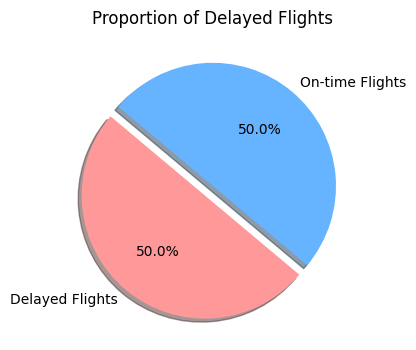

In [8]:
# Calculate the total number of flights
total_flights = len(dataset)

# Calculate the number of on-time flights
on_time_flights_count = total_flights - delayed_flights_count

# Data for the pie chart
labels = ['Delayed Flights', 'On-time Flights']
sizes = [delayed_flights_count, on_time_flights_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Delayed Flights')
plt.show()

## Check for Data Imbalance

In classification tasks, it is essential to check the distribution of classes to understand if there is a class imbalance issue. For our dataset, we need to check the distribution of delayed flights (`Arrival_Delayed`) to see if the number of delayed flights is significantly different from the number of on-time flights.

**Class Distribution:**
False    50%
 True     50%

Based on the class distribution, our dataset is perfectly balanced with an equal number of delayed and on-time flights. This means we do not need to address any class imbalance issues for our classification task.

## Statistical Summaries and Descriptive Statistics

In this section, we will compute statistical summaries and descriptive statistics for our flight dataset. This analysis will provide us with key metrics such as mean, standard deviation, minimum, maximum, and quartile values for the numerical variables.

In [9]:
# Statistical Summaries and Descriptive Statistics
summary_stats = dataset.describe()
print(summary_stats)

          Month_Day  Airline_DOT_ID  Flight_Number  Origin_Airport_ID  \
count  2.742902e+06    2.742902e+06   2.742902e+06       2.742902e+06   
mean   1.585518e+01    1.993634e+04   2.271113e+03       1.263266e+04   
std    8.735491e+00    3.758514e+02   1.549833e+03       1.522266e+03   
min    1.000000e+00    1.939300e+04   1.000000e+00       1.013500e+04   
25%    8.000000e+00    1.979000e+04   1.041000e+03       1.129200e+04   
50%    1.600000e+01    1.980500e+04   2.024000e+03       1.288900e+04   
75%    2.300000e+01    2.036300e+04   3.271000e+03       1.393000e+04   
max    3.100000e+01    2.045200e+04   8.819000e+03       1.686900e+04   

       Origin_City_Market_ID  Destination_Airport_ID  \
count           2.742902e+06            2.742902e+06   
mean            3.171884e+04            1.265522e+04   
std             1.306416e+03            1.526921e+03   
min             3.007000e+04            1.013500e+04   
25%             3.061500e+04            1.129200e+04   
50%   

### Key Insights from Statistical Summaries

- **Range of Distances**: Flights in the dataset cover a wide range of distances, from short-haul flights as low as 31 miles to longer distances up to 5095 miles.

## Univariate Analysis

Univariate analysis involves examining each variable individually. For numerical variables, we typically look at distributions, while for categorical variables, we look at counts or proportions.*italicized text*

In [10]:
# List of variables to drop
variables_to_drop = ['Airline_DOT_ID', 'Flight_Number','Number_of_Flights', 'Tail_Number', 'Origin_Airport_ID', 'Origin_IATA_Code',
                     'Origin_City_Market_ID', 'Destination_Airport_ID', 'Destination_IATA_Code',
                     'Destination_City_Market_ID','Scheduled_Departure_Time','Scheduled_Arrival_Time', 'Scheduled_Gate_to_Gate_Time', 'Flight_Cancelled','Arr_Time_Block_Group', 'Flight_Diverted']
dataset = dataset.drop(variables_to_drop, axis=1)
print(dataset.columns)

Index(['Carrier', 'Month_Day', 'Flight_Weekday', 'Flight_Date',
       'Origin_City_State', 'Destination_State', 'Dep_Time_Block_Group',
       'Dep_Delay_At_Least_15_Minutes', 'Arrival_Delayed', 'Flight_Distance',
       'Distance_Group'],
      dtype='object')


### Univariate Analysis: Numerical Variables

We will examine the distribution of numerical variables in our dataset.


In [11]:
numerical_vars = dataset.select_dtypes(include=['int', 'float']).columns.tolist()
print(numerical_vars)

['Month_Day', 'Dep_Delay_At_Least_15_Minutes', 'Arrival_Delayed', 'Flight_Distance', 'Distance_Group']


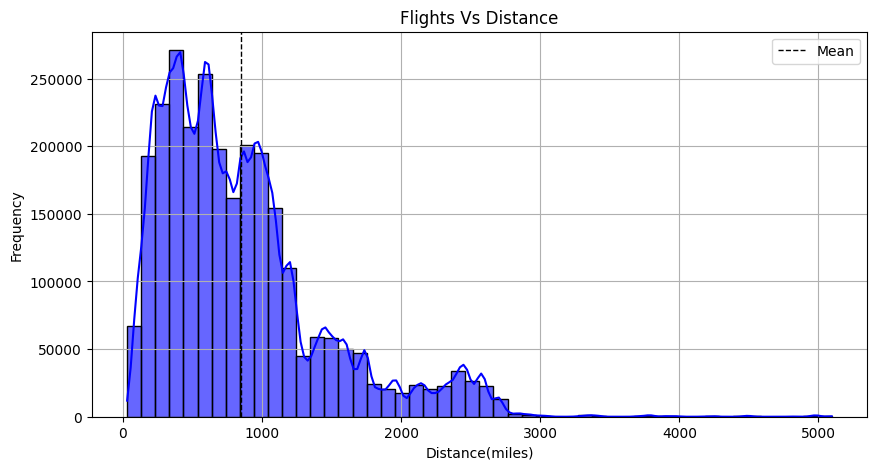

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset["Flight_Distance"], bins=50, kde=True, color='blue', alpha=0.6)
plt.title(f'Flights Vs Distance')
plt.xlabel('Distance(miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(dataset['Flight_Distance'].mean(), color='k', linestyle='--', linewidth=1, label='Mean')
plt.legend()
plt.show()

### Description of Histogram Plot: Distribution of Flight Distances

The histogram illustrates the distribution of flight distances in the dataset, where each bar represents a range of distances and its height indicates the frequency (number of flights) within that range.

**Key Observations:**
- The distribution of flight distances appears to be skewed to the right, with a higher concentration of flights in shorter distance ranges.
- The peak around the mean distance (indicated by the dashed line) suggests that many flights cover distances close to the average (850 miles)
- There are fewer flights as distances increase, indicating that longer flights are less common in the dataset.
- Most flights in the dataset cover distances ranging from approximately 31 miles to 5095 miles.


### Univariate Analysis: Categorical Variables

We will examine the distribution of categorical variables in our dataset.


In [13]:
categorical_vars = dataset.select_dtypes(include='object').columns.tolist()
print("Categorical Variables:")
print(categorical_vars)

Categorical Variables:
['Carrier', 'Flight_Weekday', 'Flight_Date', 'Origin_City_State', 'Destination_State', 'Dep_Time_Block_Group']


#### Distribution of Flights by Carriers

This plot visualizes the distribution of flights across different carriers, focusing on the top 10 categories with the highest number of flights. It provides insights into the frequency of flights operated by each carrier in the dataset

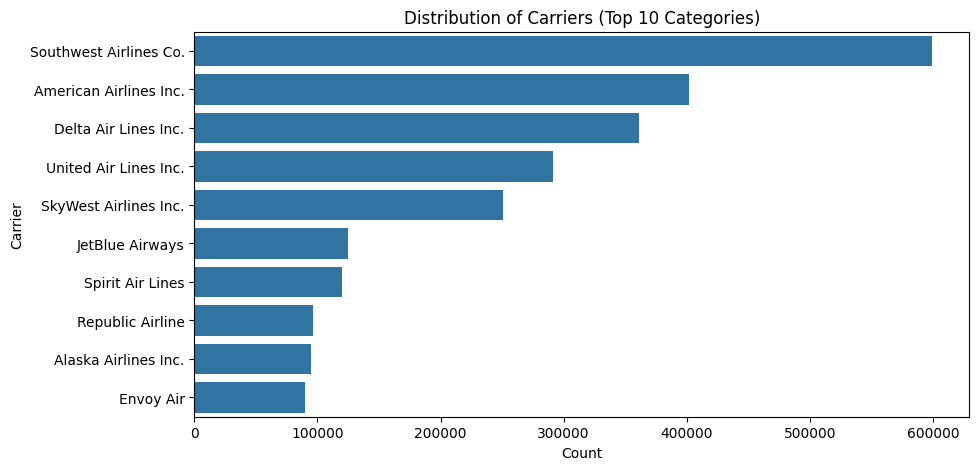

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data = dataset, y = "Carrier", order = dataset["Carrier"].value_counts().index[:10])
plt.title(f'Distribution of Carriers (Top 10 Categories)')
plt.xlabel('Count')
plt.ylabel("Carrier")
plt.show()

### Distribution of Flights Across Weekdays

In this plot, we aim to visualize the distribution of flights across different weekdays. This analysis helps us understand the frequency of flights on each day of the week. It can provide insights into patterns such as whether certain days have higher flight traffic compared to others.

Understanding the distribution of flights by weekdays is crucial for identifying peak travel days, which can inform scheduling, resource allocation, and strategic planning for airlines.


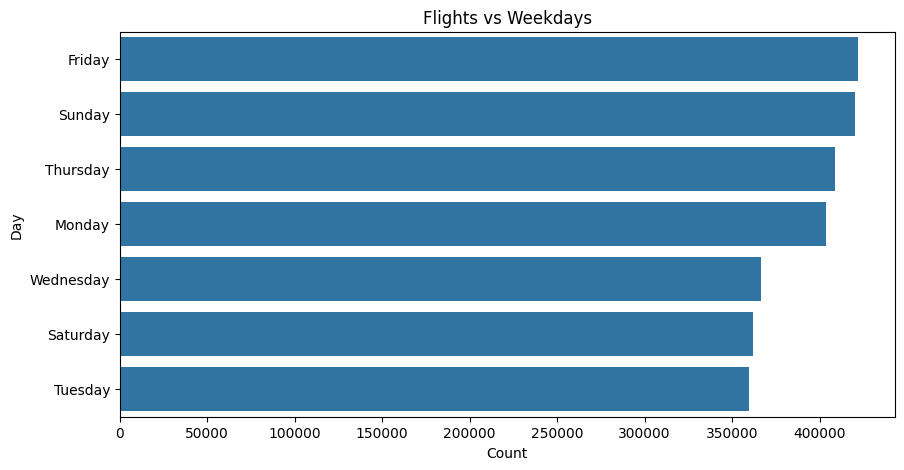

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data = dataset, y = "Flight_Weekday", order = dataset["Flight_Weekday"].value_counts().index)
plt.title("Flights vs Weekdays")
plt.xlabel("Count")
plt.ylabel("Day")
plt.show()

**Observation**:
The results indicate that the number of flights is fairly consistent across all weekdays. This suggests that there is no significant variation in flight frequency between different days of the week, implying a balanced distribution of flight operations throughout the week.

Understanding this uniform distribution is important as it can suggest that airlines and airports maintain a steady level of operations regardless of the day, which can influence planning and resource management.

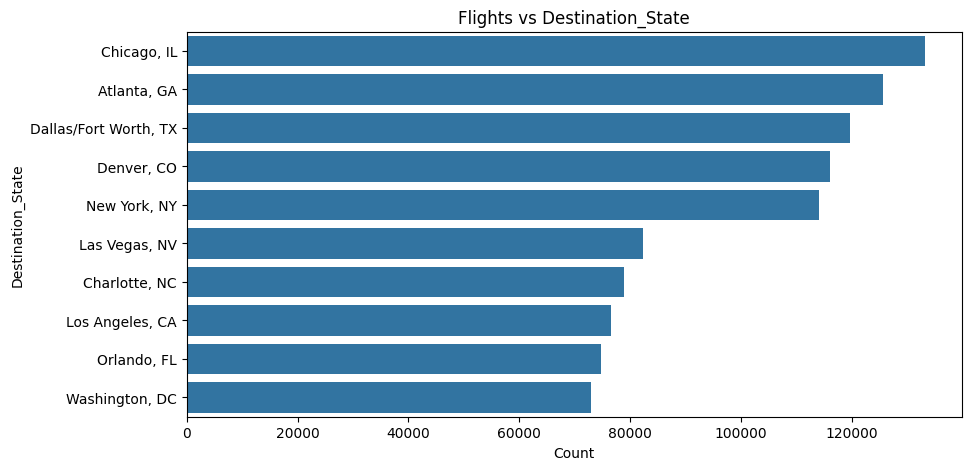

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data = dataset, y = "Destination_State", order = dataset["Destination_State"].value_counts().index[:10])
plt.title("Flights vs Destination_State")
plt.xlabel('Count')
plt.ylabel("Destination_State")
plt.show()

In [17]:
print(categorical_vars)

['Carrier', 'Flight_Weekday', 'Flight_Date', 'Origin_City_State', 'Destination_State', 'Dep_Time_Block_Group']


##Bivariate Analysis
We will examine the relationship between "Arrival_Delayed" and each variable.

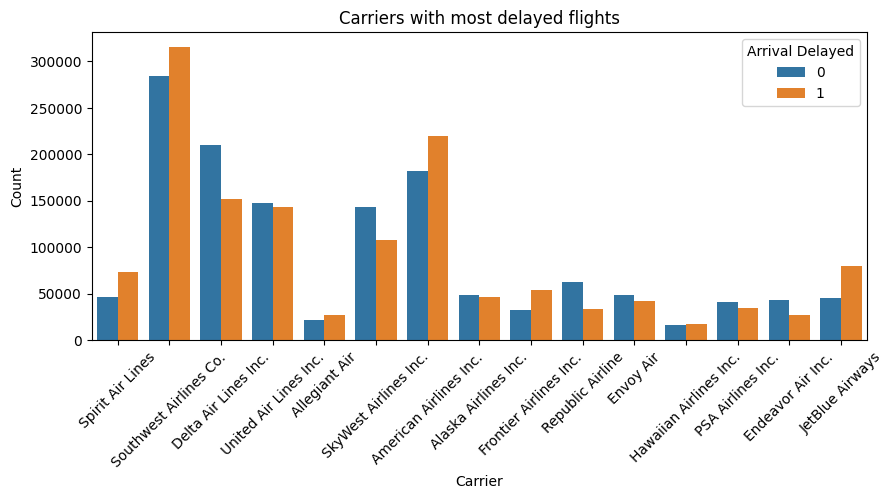

In [18]:
plt.figure(figsize=(10, 4))
# Convert 'Arrival_Delayed' column to string type if it's not already
dataset['Arrival_Delayed'] = dataset['Arrival_Delayed'].astype(str)
sns.countplot(data = dataset, x="Carrier", hue='Arrival_Delayed')
plt.title("Carriers with most delayed flights")
plt.xlabel("Carrier")
plt.ylabel('Count')
plt.legend(title='Arrival Delayed', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [19]:
top_delayed_carriers = dataset.groupby(['Carrier', 'Arrival_Delayed']).size().unstack().fillna(0)
delayed_column_name = top_delayed_carriers.columns[1]
top_delayed_carriers['Arrival_Delayed'] = top_delayed_carriers[delayed_column_name]
top_delayed_carriers = top_delayed_carriers.sort_values(by='Arrival_Delayed', ascending=False).head(10)
print(top_delayed_carriers)

Arrival_Delayed              0       1  Arrival_Delayed
Carrier                                                
Southwest Airlines Co.  283954  315680           315680
American Airlines Inc.  182512  219459           219459
Delta Air Lines Inc.    209699  151363           151363
United Air Lines Inc.   147522  143586           143586
SkyWest Airlines Inc.   143146  107558           107558
JetBlue Airways          45131   79975            79975
Spirit Air Lines         46737   72797            72797
Frontier Airlines Inc.   31905   53417            53417
Alaska Airlines Inc.     48509   46348            46348
Envoy Air                48416   41799            41799


#### Key Insights:
Here are the top carriers with the most delayed flights:

1. **Southwest Airlines Co.** has the highest number of delayed flights, with 315,680 delays.
2. **American Airlines Inc.** follows with 219,459 delayed flights.
3. **Delta Air Lines Inc.** has 151,363 delayed flights, making it the third highest.
4. **United Air Lines Inc.** and **SkyWest Airlines Inc.** also have significant numbers of delayed flights, with 143,586 and 107,558 respectively.
5. Other airlines with notable numbers of delayed flights include **JetBlue Airways**, **Spirit Air Lines**, **Frontier Airlines Inc.**, **Alaska Airlines Inc.**, and **Envoy Air**.

This analysis helps identify which carriers tend to have higher delays and can be useful for further investigation or for making informed decisions regarding flight selections.

### The Days with most delayed flights

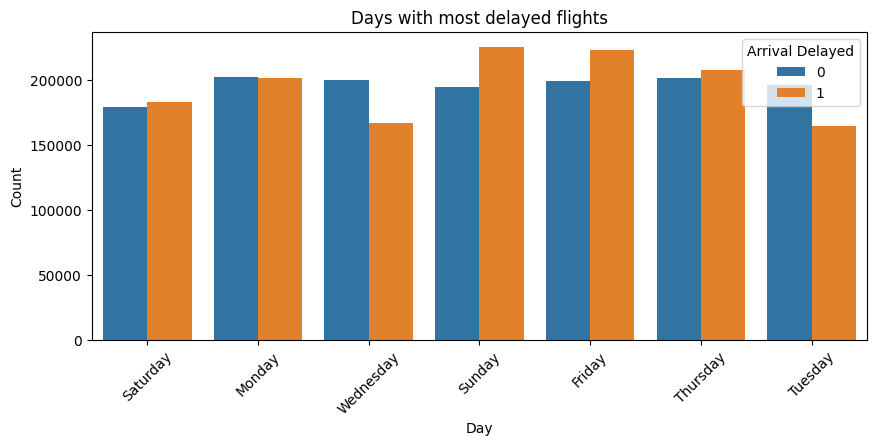

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(data = dataset, x = "Flight_Weekday", hue='Arrival_Delayed')
plt.title("Days with most delayed flights")
plt.xlabel("Day")
plt.ylabel('Count')
plt.legend(title='Arrival Delayed', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [21]:
weekday_delays = dataset.groupby(['Flight_Weekday', 'Arrival_Delayed']).size().unstack().fillna(0)
delayed_column_name = weekday_delays.columns[1]
weekday_delays['Total_Delays'] = weekday_delays[delayed_column_name]
weekday_delays = weekday_delays.sort_values(by = "Total_Delays", ascending = False).head(10)
print(weekday_delays)

Arrival_Delayed       0       1  Total_Delays
Flight_Weekday                               
Sunday           194661  225513        225513
Friday           198974  222892        222892
Thursday         201379  207300        207300
Monday           202249  201586        201586
Saturday         179032  183081        183081
Wednesday        199483  166880        166880
Tuesday          195673  164199        164199


#### Key Insights:

- **Sunday** has the highest number of delayed flights (225,513), followed closely by **Friday** (222,892) and **Thursday** (207,300).
- **Monday** also has a substantial number of delayed flights (201,586), indicating that the beginning and end of the week might have higher delays.
- **Wednesday** and **Tuesday** have fewer delayed flights (166,880 and 164,199, respectively) compared to other days of the week, suggesting these might be the best days for more on-time arrivals.
- The number of on-time flights is relatively high across all days, with **Monday** having the highest number of on-time flights (202,249).

This analysis helps identify which days of the week tend to have higher delays and can be useful for planning travel or for further investigation into the causes of these delays.

## What if destination matters ?

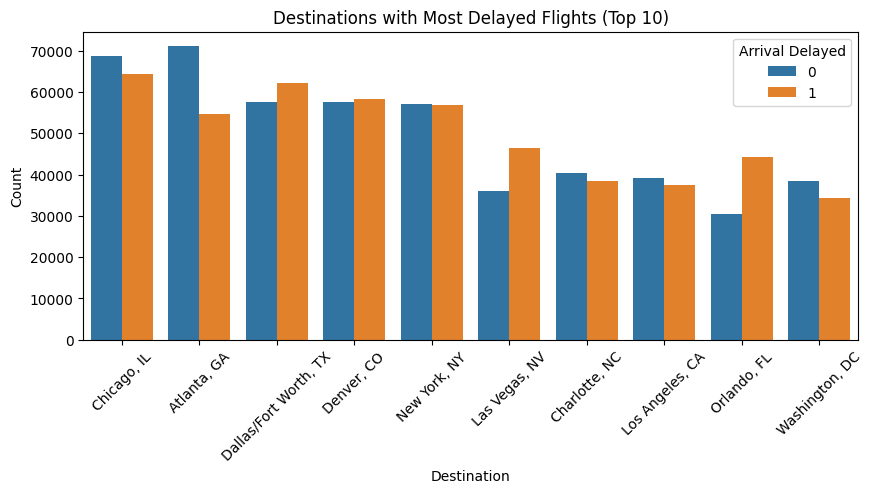

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(data = dataset, x="Destination_State", hue='Arrival_Delayed', order = dataset["Destination_State"].value_counts().index[:10])
plt.title("Destinations with Most Delayed Flights (Top 10)")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.legend(title='Arrival Delayed', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [23]:
state_delays = dataset.groupby(['Destination_State', 'Arrival_Delayed']).size().unstack().fillna(0)
delayed_column_name = state_delays.columns[1]
state_delays['Total_Delays'] = state_delays[delayed_column_name]
state_delays = state_delays.sort_values(by = "Total_Delays", ascending = False).head(10)
print(state_delays)

Arrival_Delayed              0        1  Total_Delays
Destination_State                                    
Chicago, IL            68823.0  64367.0       64367.0
Dallas/Fort Worth, TX  57538.0  62086.0       62086.0
Denver, CO             57670.0  58413.0       58413.0
New York, NY           57091.0  56955.0       56955.0
Atlanta, GA            71070.0  54600.0       54600.0
Las Vegas, NV          35988.0  46327.0       46327.0
Orlando, FL            30365.0  44352.0       44352.0
Charlotte, NC          40388.0  38433.0       38433.0
Los Angeles, CA        39106.0  37373.0       37373.0
Phoenix, AZ            38366.0  34507.0       34507.0


### Insights:

- **Chicago, IL**: Shows a balanced distribution between on-time and delayed arrivals.
  
- **Dallas/Fort Worth, TX**: Exhibits more delayed arrivals compared to on-time flights.
  
- **Denver, CO**: Similar to Dallas/Fort Worth, experiences more delays than on-time arrivals.
  
- **New York, NY**: Nearly equal distribution between on-time and delayed arrivals.
  
- **Atlanta, GA**: Has a higher number of on-time arrivals compared to delays, indicating efficient operations.
  
- **Las Vegas, NV** and **Orlando, FL**: Both cities have more delayed arrivals than on-time flights.
  
- **Charlotte, NC** and **Los Angeles, CA**: Show balanced distributions with slightly more on-time arrivals.
  
- **Phoenix, AZ**: Demonstrates more on-time arrivals compared to delays.

### Influence of Distance on Flight Delays

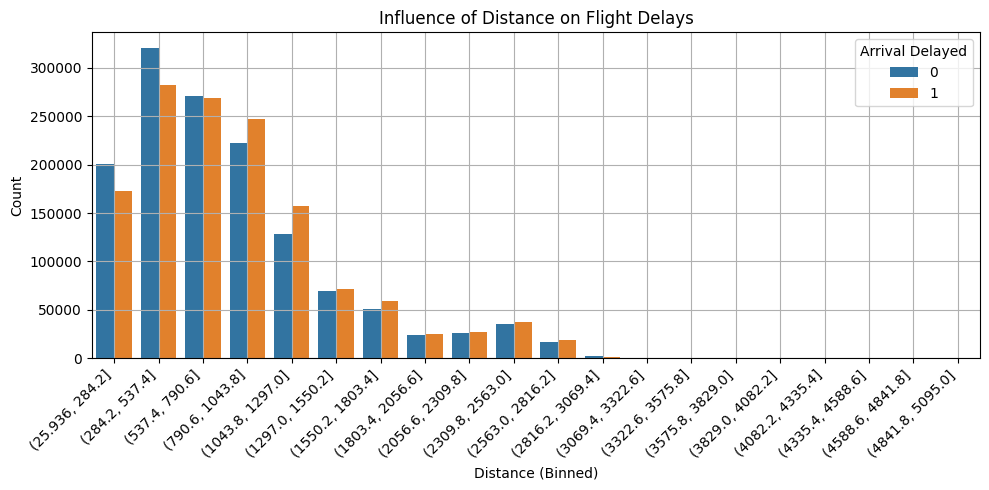

In [24]:
plt.figure(figsize=(10, 5))
# Discretize the 'Flight_Distance' into bins
bins = pd.cut(dataset['Flight_Distance'], bins=20)
sns.countplot(data = dataset, x=bins, hue='Arrival_Delayed')
plt.title("Influence of Distance on Flight Delays")
plt.xlabel("Distance (Binned)")
plt.ylabel("Count")
plt.legend(title="Arrival Delayed", loc="upper right")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Bin the 'Flight_Distance' column into intervals
distance_bins = pd.cut(dataset['Flight_Distance'], bins=20)

# Add the binned distances as a new column to the dataset
dataset['Distance_Binned'] = distance_bins

# Group the data and count occurrences of delays within each bin
grouped_data = dataset.groupby(['Distance_Binned', 'Arrival_Delayed']).size().unstack(fill_value=0)

# Get the name of the column that represents "True" for Arrival_Delayed
delayed_column_name = grouped_data.columns[1]  # Assuming 'True' is the second column (index 1)

# Sort the grouped data by the count of delays
grouped_data = grouped_data.sort_values(by=delayed_column_name, ascending=False)

print(grouped_data)

Arrival_Delayed        0       1
Distance_Binned                 
(284.2, 537.4]    320769  282234
(537.4, 790.6]    271006  269132
(790.6, 1043.8]   222055  246765
(25.936, 284.2]   200727  172537
(1043.8, 1297.0]  128850  156855
(1297.0, 1550.2]   69187   71709
(1550.2, 1803.4]   51397   58772
(2309.8, 2563.0]   35880   37293
(2056.6, 2309.8]   25653   27328
(1803.4, 2056.6]   24293   25341
(2563.0, 2816.2]   16886   19205
(2816.2, 3069.4]    2070    1825
(4841.8, 5095.0]     419     614
(3322.6, 3575.8]     628     570
(3575.8, 3829.0]     653     446
(3829.0, 4082.2]     263     274
(4335.4, 4588.6]     266     270
(3069.4, 3322.6]     144     127
(4082.2, 4335.4]     252     115
(4588.6, 4841.8]      53      39


### Insights from Flight Distance and Arrival Delays

- **Higher Delays with Shorter Distances**: Flights covering shorter distances (up to approximately 1300 miles) tend to have more arrival delays compared to longer distances.
  
- **Mixed Trends in Medium Distances**: Flights in the medium distance range (1300 to 2800 miles) show varied patterns, with some bins having higher delays and others showing fewer delays.

- **Fewer Delays in Long-Haul Flights**: Longer flights (beyond 2800 miles) generally exhibit fewer arrival delays, suggesting potentially better scheduling or operational efficiencies on longer routes.

These insights highlight how flight distance can influence the likelihood of arrival delays, providing valuable context for understanding operational challenges and potential areas for improvement in airline scheduling and operations.


### Visualizing Flight Delays Over Time

This visualization plots the trend of flight delays over the `Flight_Date` variable. Each point on the plot represents whether a flight was delayed (1) or not delayed (0) on that specific date. This helps in understanding how flight delays vary over time, potentially revealing trends, seasonal patterns, or periods of increased delay occurrences.


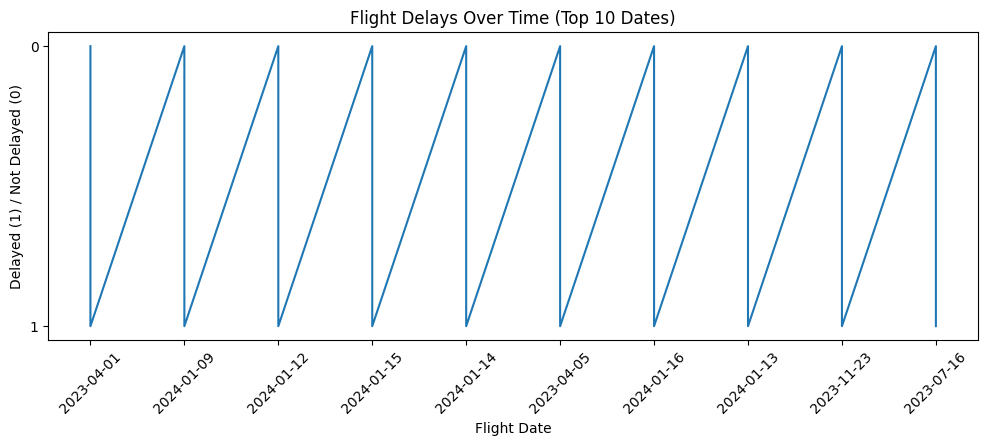

In [26]:
# Group by Flight_Date and calculate the sum of Arrival_Delayed
flight_date_counts = dataset.groupby('Flight_Date')['Arrival_Delayed'].sum()

# Sort by the counts of delayed flights and select top 10 dates
top_10_dates = flight_date_counts.sort_values(ascending=False).head(10).index

# Filter my_data to include only the top 10 dates
top_10_data = dataset[dataset['Flight_Date'].isin(top_10_dates)]

# Plotting the line plot for top 10 dates
plt.figure(figsize=(12, 4))
sns.lineplot(x ='Flight_Date', y = 'Arrival_Delayed', data = top_10_data, estimator=None)
plt.title('Flight Delays Over Time (Top 10 Dates)')
plt.xlabel('Flight Date')
plt.ylabel('Delayed (1) / Not Delayed (0)')
plt.xticks(rotation=45)
plt.show()

In [27]:
grouped_data = dataset.groupby(['Flight_Date', 'Arrival_Delayed']).size().unstack(fill_value=0)
grouped_data = grouped_data.sort_values(by=grouped_data.columns[1], ascending=False)
top_10_delayed_dates = grouped_data.head(10)
print(top_10_delayed_dates)

Arrival_Delayed     0     1
Flight_Date                
2024-01-15       2012  7748
2024-01-16       1804  7405
2023-07-16       2693  7304
2023-06-23       3143  7209
2023-07-14       3028  7150
2023-07-28       3152  7112
2023-04-05       2706  6913
2024-01-09       2153  6895
2023-06-22       3249  6654
2023-08-07       3096  6643


### Analysis of Arrival Delayed Flights by Date

The table displays the count of flights that arrived delayed (`True`) and on time (`False`) for specific dates (`Flight_Date`). Here are the observations from the data:

- **Highest Delay Counts:** On 2024-01-15, there were 7,748 flights that arrived delayed, which is notably higher compared to other dates.

-  Dates like 2024-01-15 and 2023-07-16 show high counts of delayed flights (7,748 and 7,304 respectively). This consistency may indicate recurring issues or factors contributing to delays on those specific dates